In [1]:
import os
data_path = ['data']

In [2]:
#Import the data using Pandas and examine the shape. There are 79 feature columns plus the predictor, the sale price (`SalePrice`). \n",
#There are three different types: integers (`int64`), floats (`float64`), and strings (`object`, categoricals). Examine how many there are of each data type. "

In [3]:
os.sep

'/'

In [4]:
    import pandas as pd
    import numpy as np

In [5]:
# The code was removed by Watson Studio for sharing.

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,None,3,1Fam,TA,No,706.0,0.0,...,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,None,3,1Fam,TA,Gd,978.0,0.0,...,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,None,3,1Fam,TA,Mn,486.0,0.0,...,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,None,3,1Fam,Gd,No,216.0,0.0,...,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,None,4,1Fam,TA,Av,655.0,0.0,...,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0


In [6]:
data = df_data_1

In [7]:
data.dtypes.value_counts()

object     43
float64    21
int64      16
dtype: int64

In [8]:
print(data.shape)

(1379, 80)


In [9]:
data.dtypes

1stFlrSF        float64
2ndFlrSF        float64
3SsnPorch       float64
Alley            object
BedroomAbvGr      int64
                 ...   
WoodDeckSF      float64
YearBuilt         int64
YearRemodAdd      int64
YrSold            int64
SalePrice       float64
Length: 80, dtype: object

In [10]:
# Question 2\n",
#    "\n",
#    "A significant challenge, particularly when dealing with data that have many columns, is ensuring each column gets encoded correctly. \n",
#    "\n",
#    "This is particularly true with data columns that are ordered categoricals (ordinals) vs unordered categoricals. Unordered categoricals 
#should be one-hot encoded, however this can significantly increase the number of features and creates features that are highly correlated with each other.\n",
#    "\n",
#    "Determine how many total features would be present, relative to what currently exists, if all string (object) features are one-hot encoded. 
#    Recall that the total number of one-hot encoded columns is `n-1`, where `n` is the number of categories."

In [11]:
mask = data.dtypes == np.object
categorical_cols = data.columns[mask]

In [12]:
mask

1stFlrSF        False
2ndFlrSF        False
3SsnPorch       False
Alley            True
BedroomAbvGr    False
                ...  
WoodDeckSF      False
YearBuilt       False
YearRemodAdd    False
YrSold          False
SalePrice       False
Length: 80, dtype: bool

In [13]:
categorical_cols

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
       'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities'],
      dtype='object')

In [14]:
# Determine how many extra columns would be created
num_ohc_cols = (data[categorical_cols].apply(lambda x: x.nunique()).sort_values(ascending=False))

In [15]:
data[categorical_cols].apply(lambda x: x.nunique())

Alley             3
BldgType          5
BsmtCond          4
BsmtExposure      5
BsmtFinType1      6
BsmtFinType2      7
BsmtQual          5
CentralAir        2
Condition1        9
Condition2        8
Electrical        5
ExterCond         4
ExterQual         4
Exterior1st      14
Exterior2nd      16
Fence             5
FireplaceQu       6
Foundation        6
Functional        7
GarageCond        5
GarageFinish      3
GarageQual        5
GarageType        6
Heating           6
HeatingQC         5
HouseStyle        8
KitchenQual       4
LandContour       4
LandSlope         3
LotConfig         5
LotShape          4
MSZoning          5
MasVnrType        4
MiscFeature       5
Neighborhood     25
PavedDrive        3
PoolQC            4
RoofMatl          8
RoofStyle         6
SaleCondition     6
SaleType          9
Street            2
Utilities         2
dtype: int64

In [16]:
    # No need to encode if there is only one value
small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]
    # Number of one-hot columns is one less than the number of categories
small_num_ohc_cols -= 1
    # This is 215 columns, assuming the original ones are dropped. 
    # This is quite a few extra columns!
small_num_ohc_cols.sum()

215

In [17]:
'''Question 3
    
    "Let's create a new data set where all of the above categorical features will be one-hot encoded. We can fit this data and see how it affects the results.
   
    Used the dataframe `.copy()` method to create a completely separate copy of the dataframe for one-hot encoding
    On this new dataframe, one-hot encode each of the appropriate columns and add it back to the dataframe. Be sure to drop the original column.
    For the data that are not one-hot encoded, drop the columns that are string categoricals.\n",
    
    For the first step, numerically encoding the string categoricals, either Scikit-learn;s 
    `LabelEncoder` or `DictVectorizer` can be used. However, the former is probably easier since it doesn't require specifying a numerical value for each
    category, and we are going to one-hot encode all of the numerical values anyway. (Can you think of a time when `DictVectorizer` might be preferred?)'''

'Question 3\n    \n    "Let\'s create a new data set where all of the above categorical features will be one-hot encoded. We can fit this data and see how it affects the results.\n   \n    Used the dataframe `.copy()` method to create a completely separate copy of the dataframe for one-hot encoding\n    On this new dataframe, one-hot encode each of the appropriate columns and add it back to the dataframe. Be sure to drop the original column.\n    For the data that are not one-hot encoded, drop the columns that are string categoricals.\n",\n    \n    For the first step, numerically encoding the string categoricals, either Scikit-learn;s \n    `LabelEncoder` or `DictVectorizer` can be used. However, the former is probably easier since it doesn\'t require specifying a numerical value for each\n    category, and we are going to one-hot encode all of the numerical values anyway. (Can you think of a time when `DictVectorizer` might be preferred?)'

In [18]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
    # Copy of the data\n
data_ohc = data.copy()
    
# The encoders
le = LabelEncoder()
ohc = OneHotEncoder()
for col in num_ohc_cols.index:
    # Integer encode the string categories
    dat = le.fit_transform(data_ohc[col]).astype(np.int)
    # One hot encode the data--this returns a sparse array
    new_dat = ohc.fit_transform(dat.reshape(-1,1))

    # Remove the original column from the dataframe
    data_ohc = data_ohc.drop(col, axis=1)
    #get all unique values so we can identify later
    cats = ohc.categories
    # Create unique column names
    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]
    # Create the new dataframe\
    new_df = pd.DataFrame(new_dat.toarray(),index=data_ohc.index,columns=col_names)
    # Append the new data to the dataframe
    data_ohc = pd.concat([data_ohc, new_df], axis=1)





In [19]:
cats

'auto'

In [20]:
num_ohc_cols.index

Index(['Neighborhood', 'Exterior2nd', 'Exterior1st', 'SaleType', 'Condition1',
       'HouseStyle', 'RoofMatl', 'Condition2', 'Functional', 'BsmtFinType2',
       'FireplaceQu', 'Foundation', 'RoofStyle', 'SaleCondition',
       'BsmtFinType1', 'Heating', 'GarageType', 'BsmtExposure', 'Electrical',
       'Fence', 'GarageCond', 'GarageQual', 'BsmtQual', 'LotConfig',
       'MSZoning', 'MiscFeature', 'BldgType', 'HeatingQC', 'KitchenQual',
       'LandContour', 'BsmtCond', 'LotShape', 'MasVnrType', 'ExterQual',
       'ExterCond', 'PoolQC', 'Alley', 'GarageFinish', 'LandSlope',
       'PavedDrive', 'CentralAir', 'Street', 'Utilities'],
      dtype='object')

In [21]:
data['Neighborhood'].shape

(1379,)

In [22]:
data['Neighborhood']

0       CollgCr
1       Veenker
2       CollgCr
3       Crawfor
4       NoRidge
         ...   
1374    Gilbert
1375     NWAmes
1376    Crawfor
1377      NAmes
1378    Edwards
Name: Neighborhood, Length: 1379, dtype: object

In [23]:
data[['Neighborhood']]

,Neighborhood
0,CollgCr
1,Veenker
2,CollgCr
3,Crawfor
4,NoRidge
...,...
1374,Gilbert
1375,NWAmes
1376,Crawfor
1377,NAmes


In [24]:
data[['Neighborhood']].shape

(1379, 1)

In [25]:
col = 'Neighborhood'

new_dat1 = ohc.fit_transform(data[[col]])

In [26]:
new_dat1

<1379x25 sparse matrix of type '<class 'numpy.float64'>'
	with 1379 stored elements in Compressed Sparse Row format>

In [27]:
pd.DataFrame(new_dat1)

,0
0,"(0, 5)\t1.0"
1,"(0, 24)\t1.0"
2,"(0, 5)\t1.0"
3,"(0, 6)\t1.0"
4,"(0, 15)\t1.0"
...,...
1374,"(0, 8)\t1.0"
1375,"(0, 14)\t1.0"
1376,"(0, 6)\t1.0"
1377,"(0, 12)\t1.0"


In [28]:
pd.DataFrame(new_dat1.toarray())

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1376,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
#column difference is as calculated above
data_ohc.shape[1] - data.shape[1]


215

In [30]:
print(data.shape[1])
# Remove the string columns from the dataframe
data = data.drop(num_ohc_cols.index, axis=1)
print(data.shape[1])

80
37


In [31]:
'''"\n",
    "*Create train and test splits of both data sets. To ensure the data gets split the same way, use the same `random_state` in each of the two splits.\n",
    "* For each data set, fit a basic linear regression model on the training data. \n",
    "* Calculate the mean squared error on both the train and test sets for the respective models. Which model produces smaller error on the test data and why?"'''

'"\n",\n    "*Create train and test splits of both data sets. To ensure the data gets split the same way, use the same `random_state` in each of the two splits.\n",\n    "* For each data set, fit a basic linear regression model on the training data. \n",\n    "* Calculate the mean squared error on both the train and test sets for the respective models. Which model produces smaller error on the test data and why?"'

In [32]:
from sklearn.model_selection import train_test_split
y_col = 'SalePrice'
# Split the data that is not one-hot encoded\n",
feature_cols = [x for x in data.columns if x != y_col]
X_data = data[feature_cols]
y_data = data[y_col]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,test_size=0.3, random_state=42)
# Split the data that is one-hot encoded
feature_cols = [x for x in data_ohc.columns if x != y_col]
X_data_ohc = data_ohc[feature_cols]
y_data_ohc = data_ohc[y_col]
X_train_ohc, X_test_ohc, y_train_ohc, y_test_ohc = train_test_split(X_data_ohc, y_data_ohc,test_size=0.3, random_state=42)

In [33]:
#non one hot encoded data
X_train.shape

(965, 36)

In [34]:
y_train.shape

(965,)

In [35]:
#one hot encoded data
X_train_ohc.shape

(965, 294)

In [36]:
y_train_ohc.shape

(965,)

In [37]:
# Compare each indices to ensure they are identical one by match
(X_train_ohc.index == X_train.index)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [38]:
# Compare the indices to ensure they are identical, every single value
(X_train_ohc.index == X_train.index).all()

True

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
    
LR = LinearRegression()
   
#Storage for error values
error_df = list()
   
#Data that have not been one-hot encoded
LR = LR.fit(X_train, y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)
   
error_df.append(pd.Series({'train': mean_squared_error(y_train,y_train_pred),'test' : mean_squared_error(y_test,  y_test_pred)},name='no enc'))

# Data that have been one-hot encoded
LR = LR.fit(X_train_ohc, y_train_ohc)
y_train_ohc_pred = LR.predict(X_train_ohc)
y_test_ohc_pred = LR.predict(X_test_ohc)
error_df.append(pd.Series({'train': mean_squared_error(y_train_ohc,y_train_ohc_pred),'test' : mean_squared_error(y_test_ohc,  y_test_ohc_pred)},name='one-hot enc'))
    
# Assemble the results\n",
error_df = pd.concat(error_df, axis=1)
error_df


,no enc,one-hot enc
train,1.131507e+09,3.177303e+08
test,1.372182e+09,3.180592e+19


In [40]:
#Note that the error values on the one-hot encoded data are very different for the train and test data. 
#In particular, the errors on the test data are much higher. Based on the lecture, this is 
#because the one-hot encoded model is overfitting the data. We will learn how to deal with issues like this in the next lesson.

In [41]:
'''Question     
    "For each of the data sets (one-hot encoded and not encoded):
    
    * Scale the all the non-hot encoded values using one of the following: `StandardScaler`, `MinMaxScaler`, `MaxAbsScaler`
    * Compare the error calculated on the test sets
    
    "Be sure to calculate the skew (to decide if a transformation should be done) and fit the scaler on *ONLY* the training data, 
    but then apply it to both the train and test data identically."'''

'Question     \n    "For each of the data sets (one-hot encoded and not encoded):\n    \n    * Scale the all the non-hot encoded values using one of the following: `StandardScaler`, `MinMaxScaler`, `MaxAbsScaler`\n    * Compare the error calculated on the test sets\n    \n    "Be sure to calculate the skew (to decide if a transformation should be done) and fit the scaler on *ONLY* the training data, \n    but then apply it to both the train and test data identically."'

In [42]:
# Mute the setting wtih a copy warnings
pd.options.mode.chained_assignment = None

In [46]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
     


In [50]:
scalers = {'standard': StandardScaler(),'minmax': MinMaxScaler(),'maxabs': MaxAbsScaler()}
    


In [52]:
training_test_sets = {'not_encoded': (X_train, y_train, X_test, y_test), 'one_hot_encoded': (X_train_ohc, y_train_ohc, X_test_ohc, y_test_ohc)}

In [54]:
scalers.items()

dict_items([('standard', StandardScaler()), ('minmax', MinMaxScaler()), ('maxabs', MaxAbsScaler())])

In [55]:
# Get the list of float columns, and the float data\n",
# so that we don't scale something we already scaled. \n",
# We're supposed to scale the original data each time\n",
mask = X_train.dtypes == np.float
float_columns = X_train.columns[mask]
# initialize model
LR = LinearRegression()


In [66]:
X_train

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
461,630.0,0.0,0.0,1,515.0,0.0,1,0,115.0,0.0,...,8,4,0.0,0.0,3,630.0,0.0,1970,2002,2009
976,845.0,0.0,0.0,3,0.0,0.0,0,0,0.0,0.0,...,3,4,0.0,0.0,5,0.0,186.0,1957,1957,2009
1128,728.0,728.0,0.0,3,0.0,0.0,0,0,728.0,0.0,...,5,6,0.0,0.0,8,728.0,100.0,2005,2005,2008
904,561.0,668.0,0.0,2,285.0,0.0,0,0,276.0,0.0,...,6,6,0.0,0.0,5,561.0,150.0,1980,1980,2009
506,1601.0,0.0,0.0,3,1358.0,0.0,1,0,223.0,0.0,...,5,8,0.0,0.0,6,1581.0,180.0,2001,2002,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,855.0,601.0,0.0,3,311.0,0.0,0,0,544.0,0.0,...,5,6,0.0,0.0,7,855.0,26.0,1978,1978,2010
1130,815.0,875.0,0.0,3,0.0,0.0,0,0,815.0,330.0,...,6,7,0.0,0.0,7,815.0,0.0,1916,1950,2006
1294,1661.0,0.0,0.0,3,831.0,0.0,1,0,161.0,0.0,...,6,6,0.0,178.0,8,992.0,0.0,1955,1996,2008
860,742.0,742.0,0.0,3,0.0,0.0,0,0,742.0,0.0,...,5,6,0.0,0.0,8,742.0,36.0,2005,2005,2009


In [67]:
X_test

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
599,1518.0,0.0,0.0,1,1218.0,0.0,0,0,300.0,0.0,...,5,8,0.0,0.0,6,1518.0,185.0,2003,2004,2008
881,925.0,0.0,0.0,2,338.0,466.0,0,1,121.0,0.0,...,6,5,0.0,0.0,5,925.0,0.0,1965,1965,2009
634,1095.0,679.0,0.0,4,0.0,0.0,1,0,1095.0,90.0,...,2,4,0.0,0.0,8,1095.0,0.0,1900,1950,2006
425,888.0,868.0,0.0,3,742.0,0.0,1,0,130.0,0.0,...,5,6,0.0,0.0,7,872.0,144.0,1996,1997,2007
906,1337.0,0.0,0.0,3,699.0,0.0,1,0,638.0,0.0,...,5,7,0.0,0.0,6,1337.0,0.0,2003,2003,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,1077.0,0.0,0.0,3,0.0,0.0,0,0,1007.0,48.0,...,4,3,0.0,0.0,6,1007.0,0.0,1922,1950,2006
59,581.0,530.0,0.0,3,0.0,0.0,0,0,530.0,144.0,...,7,5,0.0,0.0,6,530.0,0.0,1920,1996,2007
405,1412.0,0.0,0.0,3,1005.0,0.0,1,0,387.0,169.0,...,5,6,0.0,0.0,6,1392.0,0.0,1988,1988,2009
458,1073.0,0.0,0.0,3,836.0,0.0,1,0,237.0,0.0,...,7,5,0.0,0.0,6,1073.0,0.0,1965,1965,2007


In [68]:
y_test

599     274000.0
881     117500.0
634      87000.0
425     204000.0
906     185000.0
          ...   
942      91000.0
59      101000.0
405     175000.0
458     156000.0
1300    117000.0
Name: SalePrice, Length: 414, dtype: float64

In [70]:
# iterate over all possible combinations and get the errors\n",
errors = {}

for scaler_label, scaler in scalers.items():
    trainingset = scaler.fit_transform(X_train)
    testset = scaler.fit_transform(X_test)
    LR.fit(trainingset, y_train)
    predictions = LR.predict(testset)
    key = scaler_label + 'scaling:'
    errors[key] = mean_squared_error(y_test, predictions)
    
    errors = pd.Series(errors)

    for key, error_val in errors.items():
         print(key, error_val)

standardscaling: 1359298570.4070225
standardscaling: 1359298570.4070225
minmaxscaling: 3696093684.07098
standardscaling: 1359298570.4070225
minmaxscaling: 3696093684.07098
maxabsscaling: 4754032219.67191


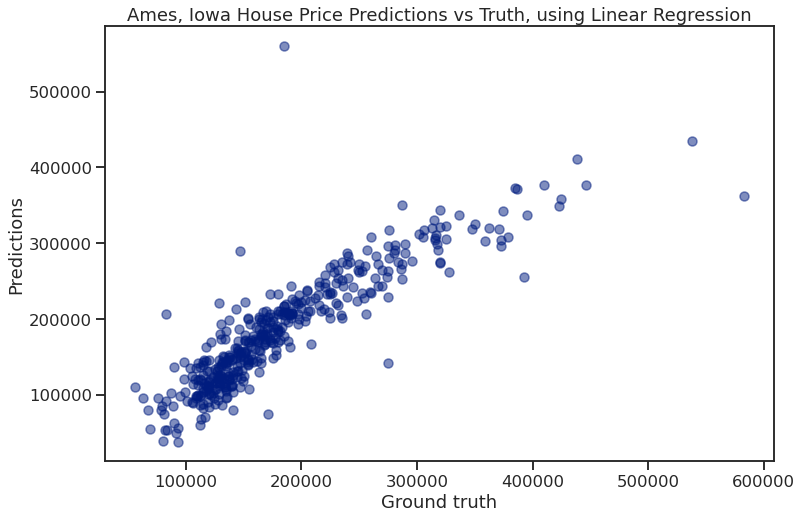

In [76]:
# Question 6 Plot predictions vs actual for one of the models.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

fig = plt.gcf()
fig.set_size_inches(12, 8)
    
ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test, y_test_pred, alpha=.5)
    
ax.set(xlabel='Ground truth',ylabel='Predictions',title='Ames, Iowa House Price Predictions vs Truth, using Linear Regression');